In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [4]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 74.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       151
           1       0.67      0.55      0.60        80

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

Confusion Matrix:
[[129  22]
 [ 36  44]]


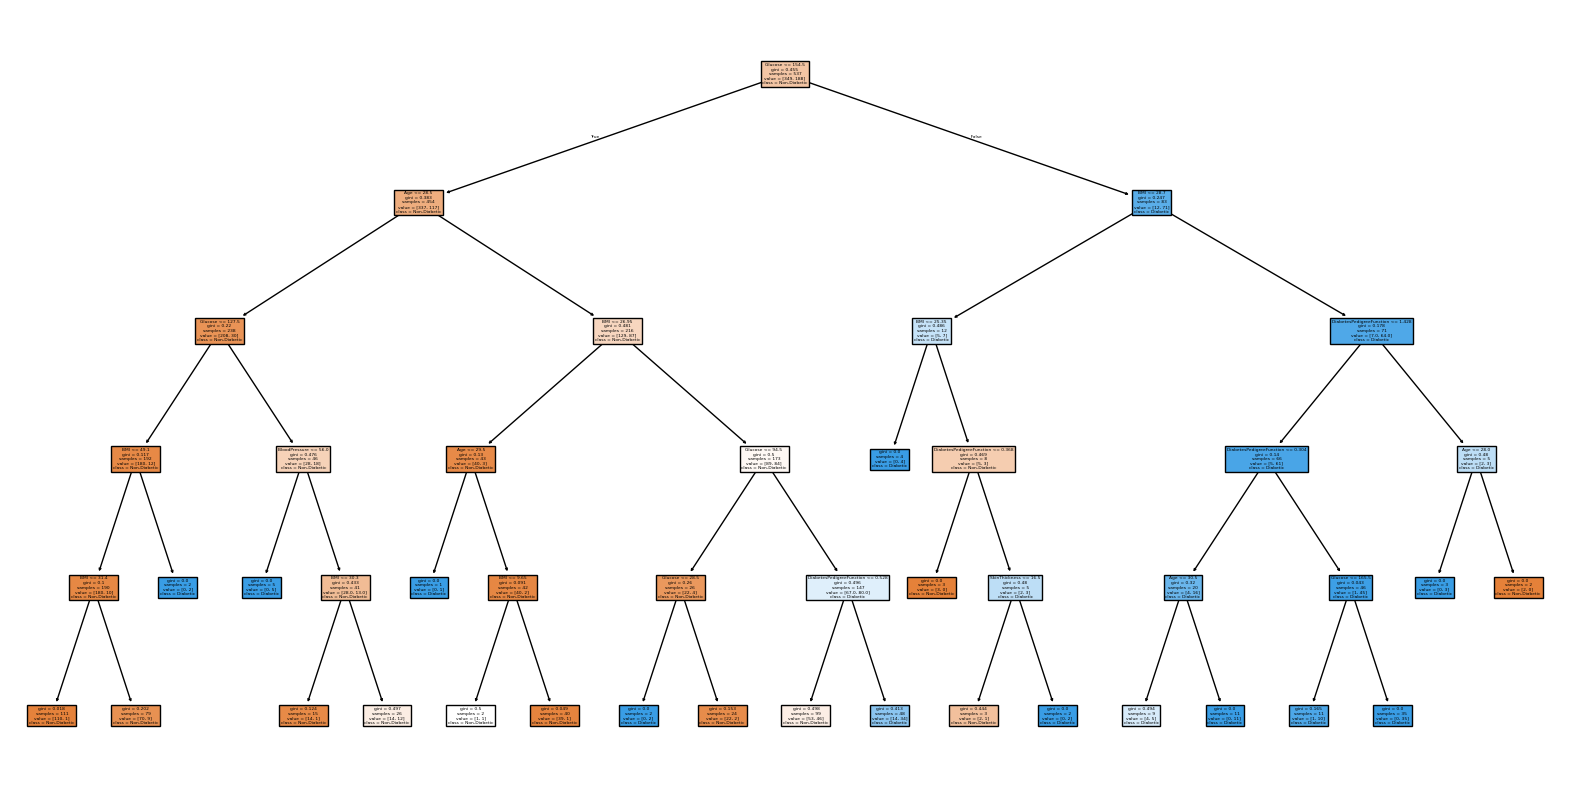

In [11]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], filled=True)
plt.show()